In [1]:
# notebooks/model_logistic_regression.ipynb

# Section 1: Import Libraries and Helpers
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)


import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from helpers.visualization_helpers import plot_confusion_matrix, display_classification_report

Preprocessed data loaded successfully.

Logistic Regression model trained successfully.
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.69      0.64       284
           2       0.42      0.45      0.44       359
           3       0.33      0.40      0.36       437
           4       0.50      0.48      0.49      1208
           5       0.76      0.72      0.74      1811

    accuracy                           0.59      4099
   macro avg       0.52      0.55      0.53      4099
weighted avg       0.60      0.59      0.59      4099

Figure saved to ../outputs/figures/logistic_regression_confusion_matrix.png


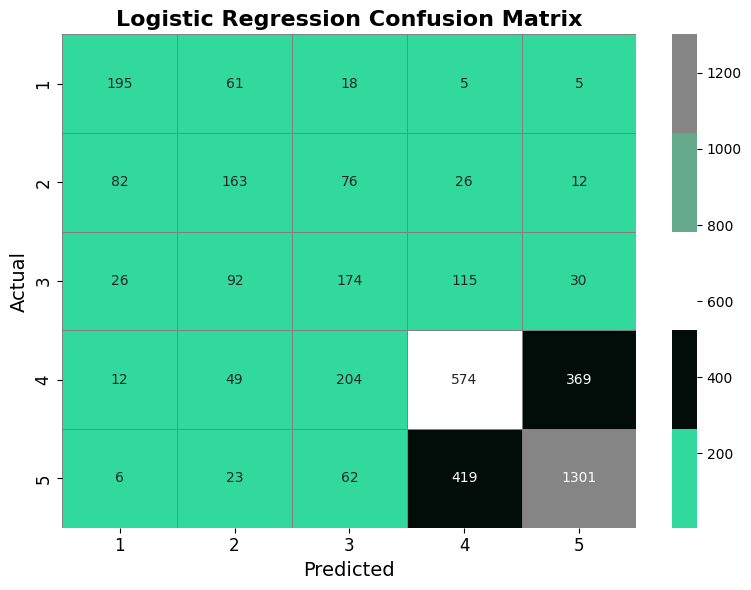


Logistic Regression model saved successfully.


In [5]:
# Section 2: Load Preprocessed Data

X_train = joblib.load('../outputs/models/X_train_balanced.joblib')
y_train = joblib.load('../outputs/models/y_train_balanced.joblib')
X_test = joblib.load('../outputs/models/X_test_tfidf.joblib')
y_test = joblib.load('../outputs/models/y_test.joblib')

print("Preprocessed data loaded successfully.")

# Section 3: Model Training

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=21)

# Train the model
log_reg.fit(X_train, y_train)
print("\nLogistic Regression model trained successfully.")

# Section 4: Model Evaluation

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Display Classification Report
display_classification_report(y_test, y_pred)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, 
                             classes=[1, 2, 3, 4, 5], 
                             title="Logistic Regression Confusion Matrix", 
                             save_path='../outputs/figures/logistic_regression_confusion_matrix.png')

# Section 5: Save the Trained Model

joblib.dump(log_reg, '../outputs/models/logistic_regression_model.joblib')
print("\nLogistic Regression model saved successfully.")
